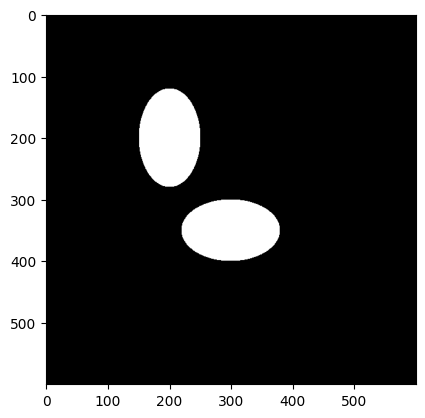

[[ 1. -1.]
 [-1.  1.]]
[[ 1.        -0.9976561]
 [-0.9976561  1.       ]]
[[ 1.        -0.9902043]
 [-0.9902043  1.       ]]
[[ 1.         -0.97807448]
 [-0.97807448  1.        ]]
[[ 1.         -0.96156736]
 [-0.96156736  1.        ]]
[[ 1.         -0.93965734]
 [-0.93965734  1.        ]]
[[ 1.         -0.91352789]
 [-0.91352789  1.        ]]
[[ 1.         -0.88323459]
 [-0.88323459  1.        ]]
[[ 1.         -0.84788948]
 [-0.84788948  1.        ]]
[[ 1.         -0.80914788]
 [-0.80914788  1.        ]]
[[ 1.         -0.76626277]
 [-0.76626277  1.        ]]
[[ 1.         -0.71969629]
 [-0.71969629  1.        ]]
[[ 1.         -0.67049834]
 [-0.67049834  1.        ]]
[[ 1.         -0.61650991]
 [-0.61650991  1.        ]]
[[ 1.         -0.56020737]
 [-0.56020737  1.        ]]
[[ 1.         -0.50227044]
 [-0.50227044  1.        ]]
[[ 1.         -0.43703173]
 [-0.43703173  1.        ]]
[[ 1.         -0.37513662]
 [-0.37513662  1.        ]]
[[ 1.         -0.30734606]
 [-0.30734606  1.      

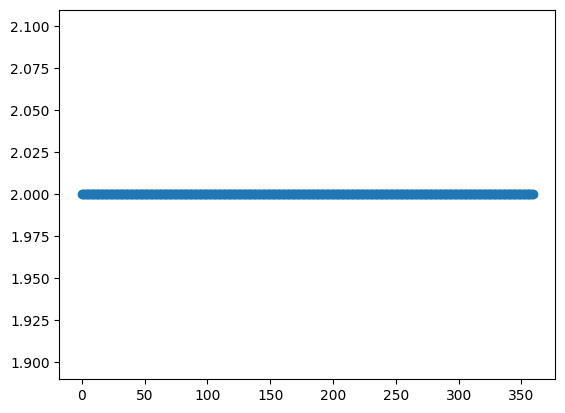

ValueError: x and y must be the same size

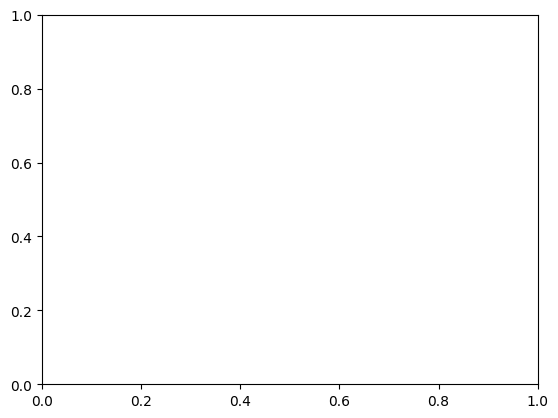

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
import scipy.ndimage

image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 80, 50)
image[rr, cc] = 1

image = rotate(image, angle=-90, order=0)

rr, cc = ellipse(200, 200, 80, 50)
image[rr, cc] = 1

#image = rotate(image, angle=-80, order=0)

image = image > 0
fig, ax = plt.subplots()
ax.imshow(image , cmap=plt.cm.gray)
plt.show()
label_img = label(image)
regions = regionprops(label_img)

angle1 = []
orient1 = []
obj_l = []
for i in range(0,360):
    angle1.append(i)
    imaged = rotate(image, angle=i, order=0)
    im_label = label(imaged)
    #plt.imshow(imaged)
    #plt.imshow(skimage.color.label2rgb(im_label))
    #plt.show()
    regions1 = regionprops(im_label)
    obj_l.append(len(regions1))
    angles = np.array([prop.orientation for prop in regions1])
    angles[angles < 0] = abs(angles[angles < 0]) 
            
    orient = np.array([[ np.cos(angle), np.sin(angle)] for angle in angles ])
    angles_rel = np.dot(orient, orient.T)
    #print(angles_rel)
    order = ((2*(np.dot(orient, orient.T))**2)-1)
    print(order)
    
    #for j in regions1:
     #   obj = j
      #  if obj.orientation < 0:
       #     orient = obj.orientation + np.pi
        #    assert orient > 0
         #   orient1.append(orient)
          #  break
       # else:
        #    orient1.append(obj.orientation)
         #   break
        

print(type(angle1))
print(type(orient1))
print(type(obj_l))

plt.scatter(angle1, obj_l)
plt.show()

plt.scatter(angle1, orient1)
plt.axvline(90)
plt.axvline(180)
plt.axvline(270)
plt.show()

print(angle1[90])
print(orient1[90])

In [ ]:
print(angle1[90])
print(orient1[90])
print(90*np.pi/180)
print(angle1[91])
print(orient1[91])
print(91*np.pi/180)

plt.scatter(angle1, np.array(angle1)*np.pi/180)
plt.show()

plt.scatter(angle1, np.array(orient1)*np.pi/180 + 90)
plt.show()

angle_in_degrees = np.array(orient1) * (180/np.pi) #+ 90
print(np.max(angle_in_degrees))
plt.scatter(angle1, angle_in_degrees)
plt.show()

plt.scatter(angle1, abs(np.array(orient1)))
plt.axvline(90)
plt.show()

interval1 = np.array(orient1)
mask_low = np.array(orient1) < 0
print(mask_low)
mask_upper = np.array(orient1) > 0
print(mask_upper)
mask_tot = mask_low*mask_upper
print(mask_tot)

interval1 = (np.array(orient1))[mask_tot]
print(interval1)

interval2 = np.array(orient1)[abs(np.array(orient1)) > 180 and abs(np.array(orient1)) <= 270]
interval3 = np.array(orient1)[abs(np.array(orient1)) > 270 and abs(np.array(orient1)) <= 360]

interval1_corrected = interval1 + 90*np.pi/180
print(interval1_corrected)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for i in range(0,len(regions)):
    props = regions[i]
    y0, x0 = props.centroid
    
    try:
        r1, r0 = regions[i+1].centroid
        pos_diff = np.sqrt((x0 - r0)**2 + (y0 - r1)**2)
        ax.plot((r0, x0), (r1, y0), '-g', linewidth=2)
        orient1 = props.orientation
        
        #print(orient1*180/np.pi)
        orient2 = regions[i+1].orientation
        
        #print(orient2*180/np.pi)
        if abs(orient1) == orient1:
            theta1 = 90 - orient1*180/np.pi
        else:
            a = -90 - orient1*180/np.pi
            theta1 = 180 + a
        
        if abs(orient2) == orient2:
            theta2 = 90 - orient2*180/np.pi
        else:
            a = -90 - orient2*180/np.pi
            theta2 = 180 + a
        
        print(np.dot(theta1, theta2)*180/np.pi)
        
        if theta1 >= theta2:
            alignment = theta1 - theta2
            print(str(alignment)+ ' 1>2')
        elif theta2 > theta1:
            alignment = theta2 - theta1
            print(str(alignment)+ ' 2>1')
        else:
            break
        
        print('hope ' + str(alignment))
        x2 = x0 - math.sin(orient1) * 0.5 * props.axis_major_length
        y2 = y0 - math.cos(orient1) * 0.5 * props.axis_major_length

        diff_x = x2 - x0
        diff_y = y2 - y0
        vector = np.array([diff_x, diff_y])

        x_iplus = r0 - math.sin(orient2) * 0.5 * regions[i+1].axis_major_length
        y_iplus = r1 - math.cos(orient2) * 0.5 * regions[i+1].axis_major_length

        diff_xiplus = x_iplus - r0
        diff_yiplus = y_iplus - r1
        vector_iplus = np.array([diff_xiplus, diff_yiplus])

        #print(vector.dot(vector_iplus)/(np.linalg.norm(vector)*np.linalg.norm(vector_iplus)))

        relative_align = np.arccos(vector.dot(vector_iplus)/(np.linalg.norm(vector)*np.linalg.norm(vector_iplus)))
        print('hello')
        print(relative_align*180/np.pi)

    except:
        r1, r0 = regions[i-1].centroid
        pos_diff = np.sqrt((x0 - r0)**2 + (y0 - r1)**2)
        ax.plot((x0, r0), (y0, r1), '--b', linewidth=2)

        orientation = props.orientation
        x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
        y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
        x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
        y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

        diff_x = x2 - x0
        diff_y = y2 - y0

    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)
    ax.plot(x2, y2, '.g', markersize=15)

ax.axis((0, 600, 600, 0))
plt.show()

y- axis is the "rows" all major axis angles are calculated relative to it.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.io import imread
from scipy.spatial.distance import pdist, squareform


# After visually inspecting the results above, use the min_distance below to segment and calculate #
# 2-point spatial orientation correlation function.#

def calculate_2_point_correlation(centroids, orientations, bin_width=5, max_distance=None):
    """
    Calculate the 2-point orientation correlation function as a function of distance.
   
    Parameters:
    centroids: numpy array of shape (N, 2), where N is the number of cells and 2 corresponds to (x, y) positions.
    orientations: numpy array of shape (N, 2), where N is the number of cells and 2 corresponds to the orientation vector.
    bin_width: The width of the distance bins to group data by distance.
    max_distance: The maximum distance to consider for correlation calculation.
   
    Returns:
    r_values: Distances corresponding to each bin.
    C_r: 2-point correlation function (average orientation dot products) for each bin.
    """
    # Calculate pairwise distances between centroids
    distances = pdist(centroids)  # Condensed distance matrix (pairwise)
    dist_matrix = squareform(distances)  # Convert to a full matrix form
   
    # Calculate pairwise order parameter from orientation vectors
    orientation_dots = ((2*(np.dot(orientations, orientations.T))**2)-1)
 
    # Maximum distance to consider for correlation
    if max_distance is None:
        max_distance = np.max(distances)
   
    # Define bins for distances
    bins = np.arange(0, max_distance + bin_width, bin_width)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
   
    # Calculate the average dot product for each bin
    C_r = np.zeros(len(bin_centers))
    C_std = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        in_bin = (dist_matrix >= bins[i]) & (dist_matrix < bins[i + 1])
        if np.any(in_bin):
            C_r[i] = np.mean(orientation_dots[in_bin])
            C_std[i] = np.std(orientation_dots[in_bin])
            
        else:
            C_r[i] = np.nan  # Set to NaN if no pairs are in the bin
            C_std[i] = np.nan
   
    return bin_centers, C_r, C_std

# Load the binary image (assuming binary image)
binary_image = imread('DC1_images/DC1_1_1.tif', as_gray=True)

# Compute the distance transform
distance = ndi.distance_transform_edt(binary_image)
#print(distance.shape)

# Find local maxima (markers)
local_maxi = peak_local_max(distance, min_distance=10, footprint=np.ones((3, 3)), labels=binary_image)
#print(local_maxi.shape)

mask = np.zeros(distance.shape, dtype=bool)
#print(mask.shape)
mask[tuple(local_maxi.T)] = True

# Label the markers
markers, _ = ndi.label(mask)

# Apply the watershed algorithm
labels = watershed(-distance, markers, mask=binary_image)

# Calculate region properties (including orientation) for each labeled region
regions = measure.regionprops(labels)

# Extract orientations and centroids (positions) of each cell
# Convert angle orientation into a unit vector
orientations = np.array([np.array([np.cos(region.orientation), np.sin(region.orientation)]) for region in regions])
centroids = np.array([region.centroid for region in regions])

# Calculate the 2-point correlation function
bin_centers, C_r, C_std = calculate_2_point_correlation(centroids, orientations, bin_width=5)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, C_r, '-o')
plt.xlabel('Distance (r)')
plt.ylabel('2-Point Correlation Function C(r)')
plt.title('2-Point Orientation Correlation Function')
plt.grid(True)
plt.show()
plt.scatter(bin_centers, C_std)